In [9]:
import time
import pytesseract
from PIL import Image
from paddleocr import PaddleOCR
import easyocr
import matplotlib.pyplot as plt

In [10]:
# Đường dẫn đến hình ảnh cần nhận diện
image_path = '/home/ubuntu/SonND/TestOCR/Data/2.jpg'

# Đọc hình ảnh
image = Image.open(image_path)

In [11]:
# Tesseract OCR
start_time = time.time()
text_tesseract = pytesseract.image_to_string(image, lang='vie')
end_time = time.time()
tesseract_time = end_time - start_time
print("Tesseract OCR:")
print(text_tesseract)
print(f"Thời gian trả kết quả: {tesseract_time:.2f} giây\n")

Tesseract OCR:
đách học tiếng Ánh danh cho

Dùng kèm với 2 băng cassette

Ê¿z„ Á<<£ˆ
[ Ruy Tãm| - Phạm Yăn Sáng

H

NHÀ

Thời gian trả kết quả: 0.68 giây



In [12]:
# PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='vi')  # Thêm các ngôn ngữ bạn muốn nhận diện
start_time = time.time()
result = ocr.ocr(image_path, cls=True)
end_time = time.time()
paddleocr_time = end_time - start_time
text_paddleocr = '\n'.join([line[1][0] for line in result[0]])
print("PaddleOCR:")
print(text_paddleocr)
print(f"Thời gian trả kết quả: {paddleocr_time:.2f} giây\n")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/latin_PP-OCRv3_rec_infer.tar to /home/ubuntu/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer/latin_PP-OCRv3_rec_infer.tar


100%|██████████| 9930/9930 [00:00<00:00, 13854.04it/s]


[2025/01/29 23:07:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/ubuntu/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/ubuntu/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_t

In [13]:
# EasyOCR
reader = easyocr.Reader(['vi'])
start_time = time.time()
result = reader.readtext(image_path)
end_time = time.time()
easyocr_time = end_time - start_time
text_easyocr = '\n'.join([line[1] for line in result])
print("EasyOCR:")
print(text_easyocr)
print(f"Thời gian trả kết quả: {easyocr_time:.2f} giây\n")

EasyOCR:
Sách  học
Anh   dành  cho
Inhungnguoi di_học Ttập_và]
Côngtác " nưóc ngoài]
Ulnh dàm thoail
Eheo hhuong hhảh
tôc
Dùng_kèm
vói 2 bãng cassette
B:ên F
[Lê
Lâm
Phạm_Yăn
NHÀ XUẤT BẢN THÀNH PHỐ HỔ_CHÍ MINH
tiếng
gíểng
cấp
Sáng
Huy
Thời gian trả kết quả: 0.61 giây



So sánh kết quả:
Tesseract OCR: 0.68 giây
PaddleOCR: 1.20 giây
EasyOCR: 0.61 giây


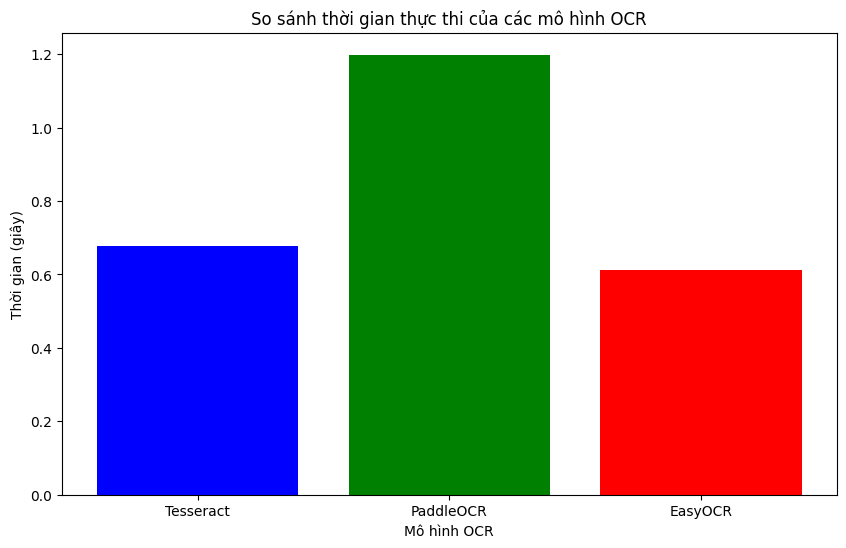

In [14]:
# So sánh kết quả
print("So sánh kết quả:")
print(f"Tesseract OCR: {tesseract_time:.2f} giây")
print(f"PaddleOCR: {paddleocr_time:.2f} giây")
print(f"EasyOCR: {easyocr_time:.2f} giây")

# Vẽ đồ thị so sánh thời gian thực thi
models = ['Tesseract', 'PaddleOCR', 'EasyOCR']
times = [tesseract_time, paddleocr_time, easyocr_time]

plt.figure(figsize=(10, 6))
plt.bar(models, times, color=['blue', 'green', 'red'])
plt.xlabel('Mô hình OCR')
plt.ylabel('Thời gian (giây)')
plt.title('So sánh thời gian thực thi của các mô hình OCR')
plt.show()

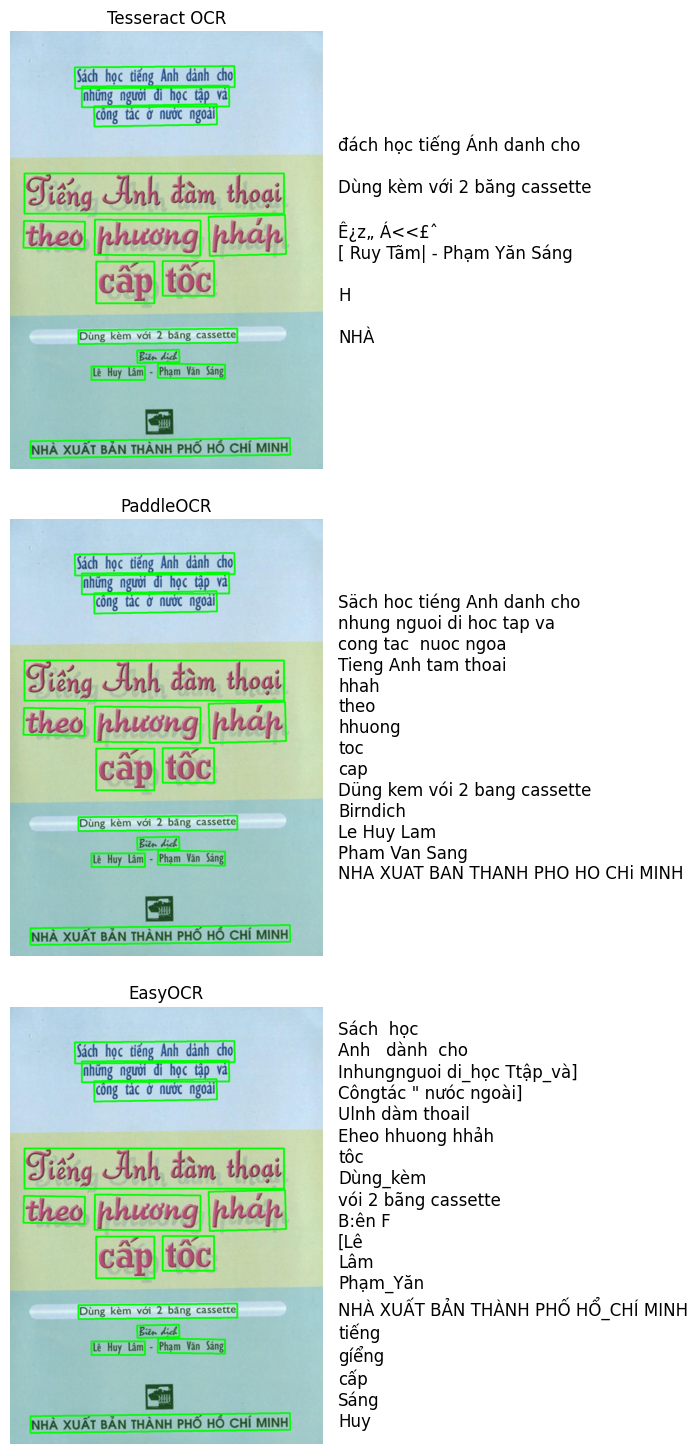

In [15]:
# Vẽ đồ thị kết quả nhận diện của từng mô hình
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Tesseract OCR
axs[0].imshow(image)
axs[0].set_title('Tesseract OCR')
axs[0].axis('off')
axs[0].text(1.05, 0.5, text_tesseract, ha='left', va='center', transform=axs[0].transAxes, fontsize=12, wrap=True)

# PaddleOCR
axs[1].imshow(image)
axs[1].set_title('PaddleOCR')
axs[1].axis('off')
axs[1].text(1.05, 0.5, text_paddleocr, ha='left', va='center', transform=axs[1].transAxes, fontsize=12, wrap=True)

# EasyOCR
axs[2].imshow(image)
axs[2].set_title('EasyOCR')
axs[2].axis('off')
axs[2].text(1.05, 0.5, text_easyocr, ha='left', va='center', transform=axs[2].transAxes, fontsize=12, wrap=True)

plt.tight_layout()
plt.show()